In [6]:
import pandas as pd

trainIn = pd.read_csv("train_in.csv", header=None)
trainOut = pd.read_csv("train_out.csv", header=None)


trainIn

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,-1.0,-1.0,-1.0,-1.000,-1.000,-0.889,0.497,0.988,0.244,-0.861,...,0.401,0.752,1.000,0.609,0.206,-0.974,-1.000,-1.000,-1.000,-1.0
1703,-1.0,-1.0,-1.0,-1.000,-1.000,-0.961,-0.211,0.647,0.464,-0.071,...,-0.983,0.635,0.236,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
1704,-1.0,-1.0,-1.0,-1.000,-0.948,-0.307,-0.718,-0.178,0.543,1.000,...,-0.822,0.720,-0.716,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
1705,-1.0,-1.0,-1.0,-1.000,-1.000,-0.806,0.417,1.000,0.627,-0.559,...,0.491,0.866,-0.712,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [7]:
import sklearn.decomposition as decomposer


In [29]:
PCA = decomposer.PCA(n_components=2)
data = PCA.fit_transform(trainIn, y=trainOut)
compressedData = pd.DataFrame(data)

In [30]:
compressedData["Digits"] = trainOut
compressedData

,0,1,Digits
0,4.811395,-5.657786,6
1,6.619904,-1.025024,5
2,1.032756,2.203027,4
3,-2.485330,6.425817,7
4,2.261413,0.340731,3
...,...,...,...
1702,-3.179748,-0.593425,8
1703,-4.579916,1.134531,9
1704,-3.762636,5.429247,7
1705,-3.751409,2.300982,9


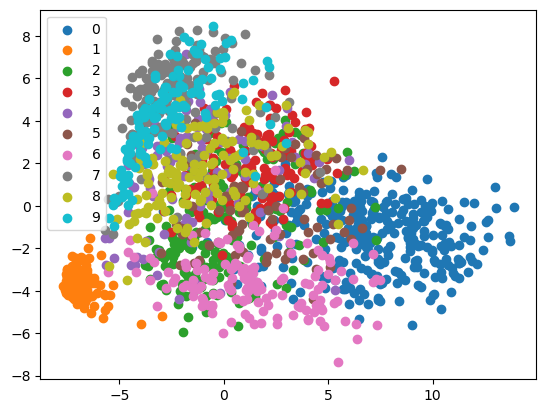

In [31]:
from cProfile import label
import matplotlib.pyplot as plt
dataset = {}
for i in range(0, 10):
    plotData = compressedData.loc[compressedData["Digits"] == i]
    plt.scatter(plotData[0], plotData[1], label = f"{i}")
plt.legend()
plt.show()

In [46]:
centrePoints = {}
for i in range(0, 10):
    datacloud = compressedData.loc[compressedData["Digits"] == i]
    x = datacloud[0].mean(axis=0)
    y = datacloud[1].mean(axis=0)
    print(f"{i} mean is ({x},{y})")
    centrePoints[i] = (x, y)


df = pd.DataFrame(centrePoints)
df

0 mean is (6.992825351387576,-1.413056586762699)
1 mean is (-7.043754106919166,-3.722077989041672)
2 mean is (0.05095776998236923,-0.9045058328080333)
3 mean is (1.2839816312954895,1.946191111212469)
4 mean is (-1.5940302163762987,1.8915572154451263)
5 mean is (2.008899881412683,-0.06105122917130265)
6 mean is (1.4490031093833033,-3.5407955106175404)
7 mean is (-2.279795776452731,5.078850749105679)
8 mean is (-0.8293489598760252,1.5949638582577756)
9 mean is (-2.5562040829934833,4.189291493329907)


,0,1,2,3,4,5,6,7,8,9
0,6.992825,-7.043754,0.050958,1.283982,-1.594030,2.008900,1.449003,-2.279796,-0.829349,-2.556204
1,-1.413057,-3.722078,-0.904506,1.946191,1.891557,-0.061051,-3.540796,5.078851,1.594964,4.189291


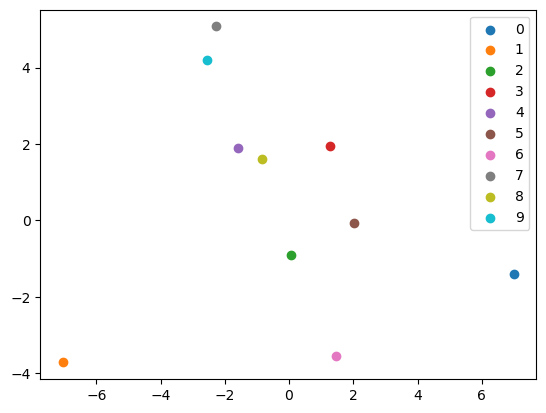

In [49]:
for i in range(0, 10):
    plt.scatter(df[i][0], df[i][1], label=f"{i}")
plt.legend()
plt.show()